In [7]:
import gzip
import pickle
import datetime

import numpy as np
import pandas as pd

import folium
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def readGz(path):
    for l in gzip.open(path, 'rt'):
        yield eval(l)

In [4]:
# Places
places_data = readGz("places.clean.json.gz")
places_df = pd.DataFrame(places_data)

In [5]:
places_df.head()

,name,price,address,hours,phone,closed,gPlusPlaceId,gps
0,Diamond Valley Lake Marina,None,"[2615 Angler Ave, Hemet, CA 92545]","[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",(951) 926-7201,False,104699454385822125632,"[33.703804, -117.003209]"
1,Blue Ribbon Cleaners,None,"[Parole, Annapolis, MD]",None,(410) 266-6123,False,103054478949000078829,"[38.979759, -76.547538]"
2,Portofino,None,"[ул. Тутаева, 1, Nazran, Ingushetia, Russia, 3...","[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",8 (963) 173-38-38,False,109810290098030327104,"[43.22776, 44.762726]"
3,T C's Referee Sports Bar,$$,"[5322 W 26th St, Sioux Falls, SD 57106]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(605) 361-2208,False,100327153115986850675,"[43.529494, -96.792244]"
4,Carrefour - Palembang Square,None,"[Jl. Angkatan 45, Kompleks Palembang Square, S...","[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(0711) 359918,False,103368487323937936043,"[-2.976256, 104.742662]"


In [6]:
len(places_df)

3114353

Select the relevant features

1. name - Name of the place
2. price - Range of price of the place \($, $$, etc\)
3. hours - Hours when the place is open on weekdays
4. gPlusPlaceId - Google ID associated with the place
5. gps - Coordinate (Latitude, Longitude) of the place

In [7]:
places_df_clean = places_df[['name', 'price', 'hours', 'gPlusPlaceId', 'gps']]

Drop the rows for which the gps is column in None

In [8]:
places_df_clean.drop(places_df_clean[places_df_clean['gps'].isna()].index, inplace=True)

In [9]:
places_df_clean.head()

,name,price,hours,gPlusPlaceId,gps
0,Diamond Valley Lake Marina,None,"[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",104699454385822125632,"[33.703804, -117.003209]"
1,Blue Ribbon Cleaners,None,None,103054478949000078829,"[38.979759, -76.547538]"
2,Portofino,None,"[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",109810290098030327104,"[43.22776, 44.762726]"
3,T C's Referee Sports Bar,$$,"[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",100327153115986850675,"[43.529494, -96.792244]"
4,Carrefour - Palembang Square,None,"[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",103368487323937936043,"[-2.976256, 104.742662]"


In [10]:
for gps in places_df_clean.gps:
    if gps is None:
        print(gps)
#     try:
#         if not isinstance(gps, list):
#             print(gps)
#     except:
#         print(gps)

Split the GPS column into two columns (latitude and longitude) and drop the GPS column

In [11]:
places_df_clean[['latitude', 'longitude']] = pd.DataFrame(places_df_clean.gps.tolist(), index=places_df_clean.index)
places_df_clean.drop('gps', axis=1, inplace=True)

In [12]:
places_df_clean.head()

,name,price,hours,gPlusPlaceId,latitude,longitude
0,Diamond Valley Lake Marina,None,"[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",104699454385822125632,33.703804,-117.003209
1,Blue Ribbon Cleaners,None,None,103054478949000078829,38.979759,-76.547538
2,Portofino,None,"[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",109810290098030327104,43.227760,44.762726
3,T C's Referee Sports Bar,$$,"[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",100327153115986850675,43.529494,-96.792244
4,Carrefour - Palembang Square,None,"[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",103368487323937936043,-2.976256,104.742662


In [13]:
places_df_clean.hours[0]

[['Monday', [['6:30 am--4:15 pm']]],
 ['Tuesday', [['6:30 am--4:15 pm']]],
 ['Wednesday', [['6:30 am--4:15 pm']], 1],
 ['Thursday', [['6:30 am--4:15 pm']]],
 ['Friday', [['6:30 am--4:15 pm']]],
 ['Saturday', [['6:30 am--4:15 pm']]],
 ['Sunday', [['6:30 am--4:15 pm']]]]

In [14]:
places_df_clean.shape

(3087402, 6)

In [15]:
places_df_clean.price.unique()

array([None, '$$', '$$$', '$', '€€€', '££', '£££', '€€', '', '€', '£',
       '₩₩₩', 'RR', '₱₱', '₩₩', '₪₪', 'RRR', '฿฿฿', '₴₴₴', '₱₱₱', '฿฿',
       'QQQ', '₦₦', '₴₴', '₡₡₡', '₸₸', '฿', '₫₫₫', '₪₪₪', 'LL', 'R', '₡₡',
       'QQ', '៛៛', '₩', '₴', '₫₫', '₱', '₸', '₡', 'LLL', '៛៛៛'],
      dtype=object)

In [16]:
places_df_clean_us = places_df_clean[places_df_clean.price.isin(['$', '$$', '$$$'])]

In [102]:
places_df_clean_us.head()

,name,price,hours,gPlusPlaceId,latitude,longitude
3,T C's Referee Sports Bar,$$,"[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",100327153115986850675,43.529494,-96.792244
9,Old Chicago,$$,"[[Monday, [['11:00 am--1:00 am']]], [Tuesday, ...",118222137795476771294,45.535176,-122.862242
10,China Cottage,$$,"[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",106432060150136868000,39.692899,-84.136173
23,Smokey Mountain Wings,$$,None,100184392614713668281,35.985980,-83.610598
31,Sabatinos Italian Kitchen,$$$,"[[Monday, [['10:00 am--10:15 pm']], 1], [Tuesd...",110300304875024740707,42.406904,-71.143994


In [103]:
places_df_clean_us = places_df_clean_us[places_df_clean_us['hours'].notna()]

In [106]:
places_df_clean_us.reset_index(drop=True, inplace=True)
places_df_clean_us.head()

,name,price,hours,gPlusPlaceId,latitude,longitude
0,T C's Referee Sports Bar,$$,"[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",100327153115986850675,43.529494,-96.792244
1,Old Chicago,$$,"[[Monday, [['11:00 am--1:00 am']]], [Tuesday, ...",118222137795476771294,45.535176,-122.862242
2,China Cottage,$$,"[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",106432060150136868000,39.692899,-84.136173
3,Sabatinos Italian Kitchen,$$$,"[[Monday, [['10:00 am--10:15 pm']], 1], [Tuesd...",110300304875024740707,42.406904,-71.143994
4,Bale Sandwich & Vietnamese Foods,$$$,"[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",101886054451353290361,57.295779,-180.000000


In [107]:
places_df_clean_us.shape

(322765, 6)

Process hours columns

In [136]:
def process_hours(hours):
    weekdays = {
        'Monday': None,
        'Tuesday': None,
        'Wednesday': None,
        'Thursday': None,
        'Friday': None,
        'Saturday': None,
        'Sunday': None
    }
    
    try:
        for hour in hours:
            weekday = hour[0]
            if weekday in weekdays:
                timings = hour[1]

                morning = 0
                night = 0

                ref_start_time = datetime.datetime.strptime("09:00 AM", "%I:%M %p")
                ref_end_time = datetime.datetime.strptime("09:00 PM", "%I:%M %p")

                for timing in timings:
                    timing = timing[0]

                    if timing == 'Open 24 hours':
                        morning = night = 12
                        break

                    if timing == 'Closed':
                        morning = night = 0
                        break

                    timing = timing.split("--")

                    start_time = datetime.datetime.strptime(timing[0], "%I:%M %p")
                    end_time = datetime.datetime.strptime(timing[1], "%I:%M %p")                    

                    if start_time > end_time:
                        end_time += datetime.timedelta(days=1)

                    # delta time
                    delta = datetime.timedelta(hours=1)

                    # iterate over range of hours
                    while (start_time <= end_time):
                        if start_time >= ref_start_time and start_time < ref_end_time:
                            morning += 1
                        else:
                            night += 1
                        start_time += delta

                if morning > 4 and night > 4:
                    weekdays[weekday] = 2 # both morning and night
                elif morning > night:
                    weekdays[weekday] = 0 # morning
                else:
                    weekdays[weekday] = 1 # night
    except:
        None
                   
    return list(weekdays.values())

In [137]:
process_hours(places_df_clean_us.hours[0])

[0, 0, 0, 0, 2, 2, 0]

In [138]:
places_df_clean_us['weekdays'] = places_df_clean_us.apply(lambda row: process_hours(row.hours), axis=1)
places_df_clean_us.head()

,name,price,hours,gPlusPlaceId,latitude,longitude,weekdays
0,T C's Referee Sports Bar,$$,"[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",100327153115986850675,43.529494,-96.792244,"[0, 0, 0, 0, 2, 2, 0]"
1,Old Chicago,$$,"[[Monday, [['11:00 am--1:00 am']]], [Tuesday, ...",118222137795476771294,45.535176,-122.862242,"[2, 2, 2, 2, 2, 2, 2]"
2,China Cottage,$$,"[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",106432060150136868000,39.692899,-84.136173,"[0, 0, 0, 0, 0, 0, 0]"
3,Sabatinos Italian Kitchen,$$$,"[[Monday, [['10:00 am--10:15 pm']], 1], [Tuesd...",110300304875024740707,42.406904,-71.143994,"[0, 0, 0, 0, 0, 0, 0]"
4,Bale Sandwich & Vietnamese Foods,$$$,"[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",101886054451353290361,57.295779,-180.000000,"[0, 0, 0, 0, 0, 0, 0]"


In [139]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

places_df_clean_us[weekdays] = pd.DataFrame(places_df_clean_us.weekdays.tolist(), index=places_df_clean_us.index)
places_df_clean_us.head()

,name,price,hours,gPlusPlaceId,latitude,longitude,weekdays,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,T C's Referee Sports Bar,$$,"[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",100327153115986850675,43.529494,-96.792244,"[0, 0, 0, 0, 2, 2, 0]",0.0,0.0,0.0,0.0,2.0,2.0,0.0
1,Old Chicago,$$,"[[Monday, [['11:00 am--1:00 am']]], [Tuesday, ...",118222137795476771294,45.535176,-122.862242,"[2, 2, 2, 2, 2, 2, 2]",2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,China Cottage,$$,"[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",106432060150136868000,39.692899,-84.136173,"[0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sabatinos Italian Kitchen,$$$,"[[Monday, [['10:00 am--10:15 pm']], 1], [Tuesd...",110300304875024740707,42.406904,-71.143994,"[0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bale Sandwich & Vietnamese Foods,$$$,"[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",101886054451353290361,57.295779,-180.000000,"[0, 0, 0, 0, 0, 0, 0]",0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
places_df_clean_us.drop('hours', axis=1, inplace=True)
places_df_clean_us.drop('weekdays', axis=1, inplace=True)

In [152]:
places_df_clean_us.head()

,name,price,gPlusPlaceId,latitude,longitude,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,T C's Referee Sports Bar,$$,100327153115986850675,43.529494,-96.792244,0.0,0.0,0.0,0.0,2.0,2.0,0.0
1,Old Chicago,$$,118222137795476771294,45.535176,-122.862242,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,China Cottage,$$,106432060150136868000,39.692899,-84.136173,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sabatinos Italian Kitchen,$$$,110300304875024740707,42.406904,-71.143994,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bale Sandwich & Vietnamese Foods,$$$,101886054451353290361,57.295779,-180.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
print(places_df_clean_us.shape)
places_df_clean_us.dropna(subset=weekdays, inplace=True)
print(places_df_clean_us.shape)

(322765, 12)
(264832, 12)


In [154]:
places_df_clean_us.reset_index(drop=True, inplace=True)
places_df_clean_us.head()

,name,price,gPlusPlaceId,latitude,longitude,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,T C's Referee Sports Bar,$$,100327153115986850675,43.529494,-96.792244,0.0,0.0,0.0,0.0,2.0,2.0,0.0
1,Old Chicago,$$,118222137795476771294,45.535176,-122.862242,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,China Cottage,$$,106432060150136868000,39.692899,-84.136173,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sabatinos Italian Kitchen,$$$,110300304875024740707,42.406904,-71.143994,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bale Sandwich & Vietnamese Foods,$$$,101886054451353290361,57.295779,-180.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
places_df_clean_us[weekdays] = places_df_clean_us[weekdays].astype(int)
places_df_clean_us.head()

,name,price,gPlusPlaceId,latitude,longitude,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,T C's Referee Sports Bar,$$,100327153115986850675,43.529494,-96.792244,0,0,0,0,2,2,0
1,Old Chicago,$$,118222137795476771294,45.535176,-122.862242,2,2,2,2,2,2,2
2,China Cottage,$$,106432060150136868000,39.692899,-84.136173,0,0,0,0,0,0,0
3,Sabatinos Italian Kitchen,$$$,110300304875024740707,42.406904,-71.143994,0,0,0,0,0,0,0
4,Bale Sandwich & Vietnamese Foods,$$$,101886054451353290361,57.295779,-180.000000,0,0,0,0,0,0,0


In [156]:
places_df_clean_us.shape

(264832, 12)

In [158]:
places_df_clean_us.price.value_counts()

$$$    132897
$$     125489
$        6446
Name: price, dtype: int64

Select the places with price \\$, \\$\\$ and \\$\\$\\$

In [14]:
gPlusPlaceIdList = places_df_clean_us['gPlusPlaceId'].to_numpy()
np.save("data/filtered_places_list", gPlusPlaceIdList)

264832


In [161]:
del gPlusPlaceIdList

Create a map of the ID and name of the place and drop the name column

In [166]:
place_id_name_map = pd.Series(places_df_clean_us.name.values, index=places_df_clean_us.gPlusPlaceId).to_dict()

In [167]:
places_df_clean_us.drop('name', axis=1, inplace=True)

In [168]:
places_df_clean_us.head()

,price,gPlusPlaceId,latitude,longitude,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,$$,100327153115986850675,43.529494,-96.792244,0,0,0,0,2,2,0
1,$$,118222137795476771294,45.535176,-122.862242,2,2,2,2,2,2,2
2,$$,106432060150136868000,39.692899,-84.136173,0,0,0,0,0,0,0
3,$$$,110300304875024740707,42.406904,-71.143994,0,0,0,0,0,0,0
4,$$$,101886054451353290361,57.295779,-180.000000,0,0,0,0,0,0,0


Save the dictionary to a file and drop the variable from memory

In [170]:
with open("data/places_id_name.pkl", 'wb') as f:
    pickle.dump(place_id_name_map, f)
    
del place_id_name_map

In [171]:
places_df_clean_us.shape

(264832, 11)

In [172]:
places_df_clean_us.head()

,price,gPlusPlaceId,latitude,longitude,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,$$,100327153115986850675,43.529494,-96.792244,0,0,0,0,2,2,0
1,$$,118222137795476771294,45.535176,-122.862242,2,2,2,2,2,2,2
2,$$,106432060150136868000,39.692899,-84.136173,0,0,0,0,0,0,0
3,$$$,110300304875024740707,42.406904,-71.143994,0,0,0,0,0,0,0
4,$$$,101886054451353290361,57.295779,-180.000000,0,0,0,0,0,0,0


In [173]:
places_df_clean_us.to_pickle("data/filtered_places.pkl")  

In [3]:
places_df_clean_us = pd.read_pickle("data/filtered_places.pkl")

In [7]:
places_df_clean_us.head()

,price,gPlusPlaceId,latitude,longitude,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,$$,100327153115986850675,43.529494,-96.792244,0,0,0,0,2,2,0
1,$$,118222137795476771294,45.535176,-122.862242,2,2,2,2,2,2,2
2,$$,106432060150136868000,39.692899,-84.136173,0,0,0,0,0,0,0
3,$$$,110300304875024740707,42.406904,-71.143994,0,0,0,0,0,0,0
4,$$$,101886054451353290361,57.295779,-180.000000,0,0,0,0,0,0,0


In [8]:
places_df_clean_us['price'] = places_df_clean_us['price'].replace(['$', '$$', '$$$'], [0, 1, 2])

In [9]:
places_df_clean_us.head()

,price,gPlusPlaceId,latitude,longitude,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,100327153115986850675,43.529494,-96.792244,0,0,0,0,2,2,0
1,1,118222137795476771294,45.535176,-122.862242,2,2,2,2,2,2,2
2,1,106432060150136868000,39.692899,-84.136173,0,0,0,0,0,0,0
3,2,110300304875024740707,42.406904,-71.143994,0,0,0,0,0,0,0
4,2,101886054451353290361,57.295779,-180.000000,0,0,0,0,0,0,0


In [11]:
places_df_clean_us.to_pickle("data/filtered_places.pkl")  

In [4]:
places_df_clean_us = pd.read_pickle("data/filtered_places.pkl")

In [5]:
places_df_clean_us.head()

,price,gPlusPlaceId,latitude,longitude,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,100327153115986850675,43.529494,-96.792244,0,0,0,0,2,2,0
1,1,118222137795476771294,45.535176,-122.862242,2,2,2,2,2,2,2
2,1,106432060150136868000,39.692899,-84.136173,0,0,0,0,0,0,0
3,2,110300304875024740707,42.406904,-71.143994,0,0,0,0,0,0,0
4,2,101886054451353290361,57.295779,-180.000000,0,0,0,0,0,0,0


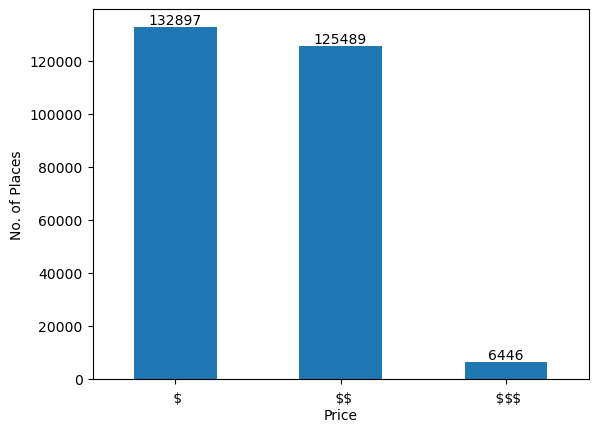

In [128]:
ax = places_df_clean_us['price'].value_counts().plot.bar()
# width=0.5, figsize=(15,10)

ax.bar_label(ax.containers[0], fmt='%g')

plt.xticks([0, 1, 2], ['\$', '\$\$', '\$\$\$'])
plt.xticks(rotation=180)

plt.xlabel("Price")
plt.ylabel("No. of Places")
plt.show()

Monday
0    188944
2     68382
1      7506
Name: Monday, dtype: int64
Tuesday
0    192317
2     68791
1      3724
Name: Tuesday, dtype: int64
Wednesday
0    192729
2     69181
1      2922
Name: Wednesday, dtype: int64
Thursday
0    191072
2     70980
1      2780
Name: Thursday, dtype: int64
Friday
0    181080
2     80973
1      2779
Name: Friday, dtype: int64
Saturday
0    179999
2     77529
1      7304
Name: Saturday, dtype: int64
Sunday
0    181235
2     58661
1     24936
Name: Sunday, dtype: int64


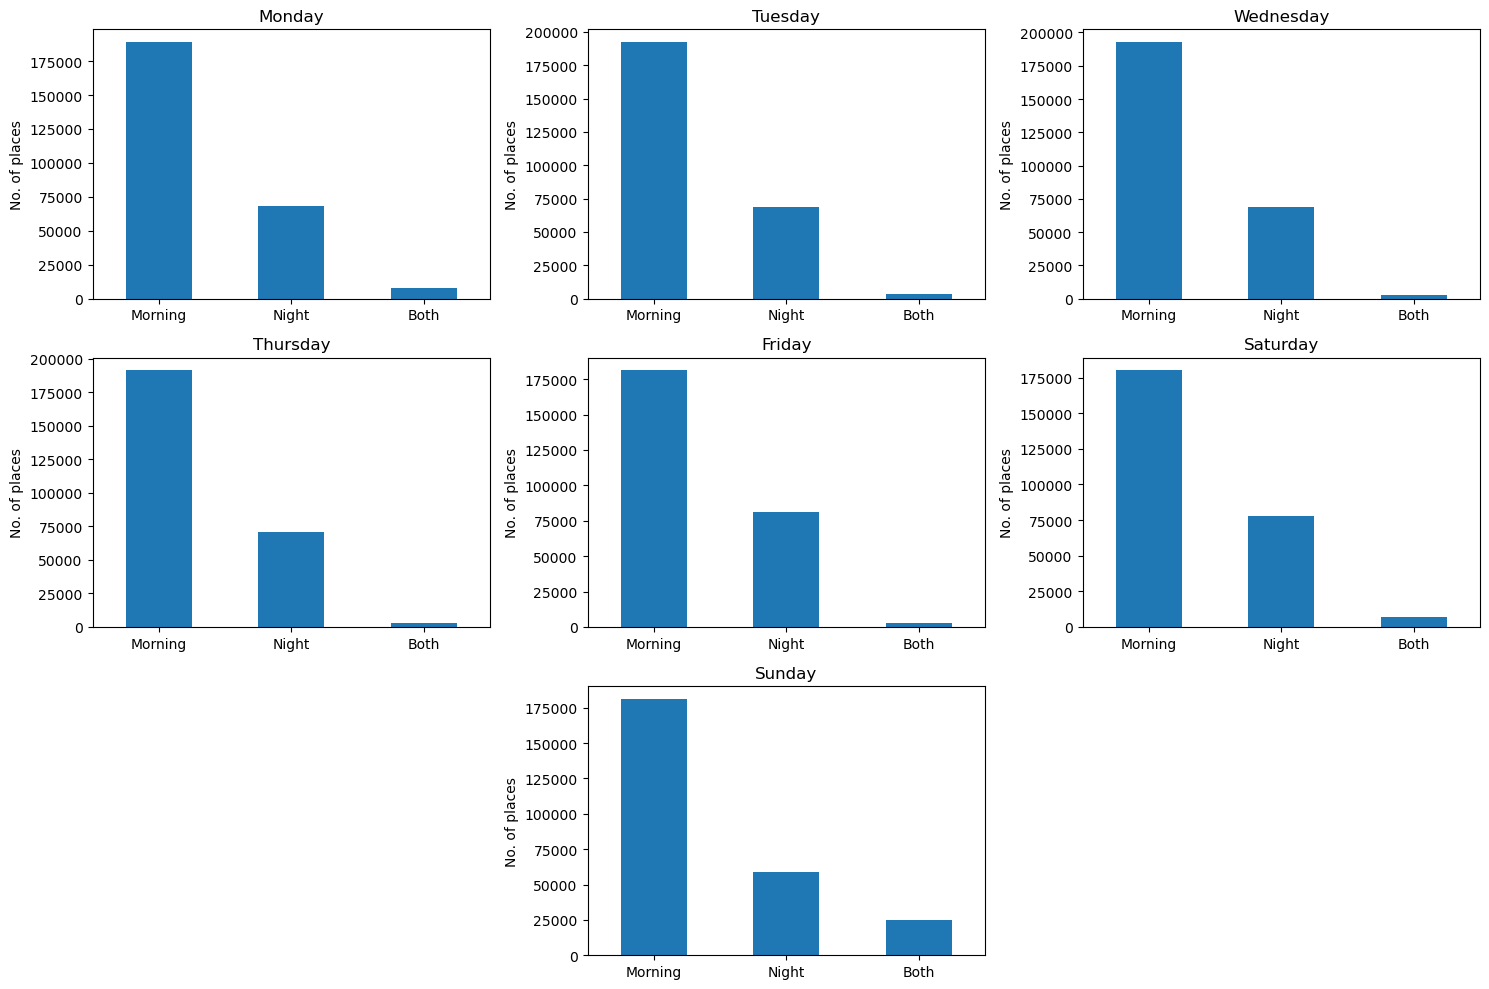

In [103]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# places_df_clean_us['Monday'].value_counts().plot.bar()
# width=0.5, figsize=(15,10)

# plt.xticks([0, 1, 2], ['Morning', 'Night', 'Both'])
# plt.xticks(rotation=0)

# plt.xlabel("Place Open Time")
# plt.ylabel("No. of Places")
# plt.title("Place Open Time vs No. of Places")
# plt.show()

fig, axes = plt.subplots(3, 3)

count = 0
for r in range(3):
    for c in range(3):
        if r == 2 and c > 0:
            continue
        elif r == 2 and c == 0:
            c = 1

        print(weekdays[count])
        print(places_df_clean_us[weekdays[count]].value_counts())
        places_df_clean_us[weekdays[count]].value_counts().plot.bar(ax = axes[r, c], width=0.5, figsize=(15,10))
        axes[r,c].set_title('{}'.format(weekdays[count]))
        plt.sca(axes[r,c])
        plt.xticks([0, 1, 2], ['Morning', 'Night', 'Both'])
        plt.xticks(rotation=0)
        plt.ylabel('No. of places')
        count += 1
        
fig.delaxes(ax=axes[2,0])
fig.delaxes(ax=axes[2,2])

fig.tight_layout()

In [65]:
places_df_clean_us['Sunday'].value_counts()[0]

181235

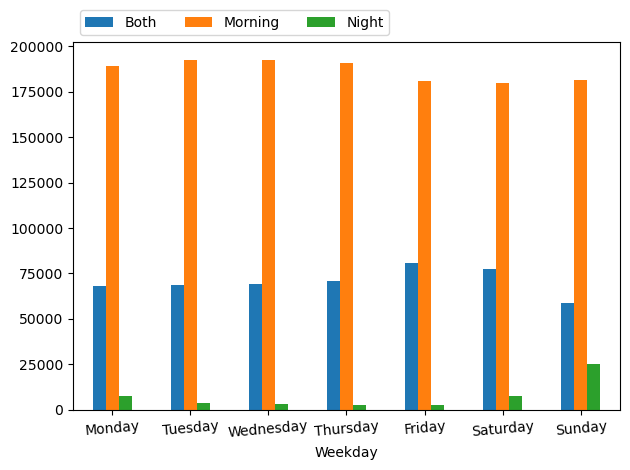

In [102]:
df = pd.DataFrame(
    [['Morning','Monday',places_df_clean_us['Monday'].value_counts()[0]],
     ['Night','Monday',places_df_clean_us['Monday'].value_counts()[1]],
     ['Both','Monday',places_df_clean_us['Monday'].value_counts()[2]],
     ['Morning','Tuesday',places_df_clean_us['Tuesday'].value_counts()[0]],
     ['Night','Tuesday',places_df_clean_us['Tuesday'].value_counts()[1]],
     ['Both','Tuesday',places_df_clean_us['Tuesday'].value_counts()[2]],
     ['Morning','Wednesday',places_df_clean_us['Wednesday'].value_counts()[0]],
     ['Night','Wednesday',places_df_clean_us['Wednesday'].value_counts()[1]],
     ['Both','Wednesday',places_df_clean_us['Wednesday'].value_counts()[2]],
     ['Morning','Thursday',places_df_clean_us['Thursday'].value_counts()[0]],
     ['Night','Thursday',places_df_clean_us['Thursday'].value_counts()[1]],
     ['Both','Thursday',places_df_clean_us['Thursday'].value_counts()[2]],
     ['Morning','Friday',places_df_clean_us['Friday'].value_counts()[0]],
     ['Night','Friday',places_df_clean_us['Friday'].value_counts()[1]],
     ['Both','Friday',places_df_clean_us['Friday'].value_counts()[2]],
     ['Morning','Saturday',places_df_clean_us['Saturday'].value_counts()[0]],
     ['Night','Saturday',places_df_clean_us['Saturday'].value_counts()[1]],
     ['Both','Saturday',places_df_clean_us['Saturday'].value_counts()[2]],
     ['Morning','Sunday',places_df_clean_us['Sunday'].value_counts()[0]],
     ['Night','Sunday',places_df_clean_us['Sunday'].value_counts()[1]],
     ['Both','Sunday',places_df_clean_us['Sunday'].value_counts()[2]]],
    columns=['Restaurant Type','Weekday','No. of Places'])

df.pivot("Weekday", "Restaurant Type", "No. of Places").loc[weekdays].plot(kind='bar')

plt.xticks(rotation=5)
plt.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=3)

plt.tight_layout()
plt.show()

In [12]:
places_df_clean_us['gPlusPlaceId'].nunique()

264832

In [24]:
places_df_clean_us_1 = places_df_clean_us[places_df_clean_us.price == '$']
places_df_clean_us_1.shape

(15607, 4)

In [104]:
world_map = folium.Map()    
world_map

In [105]:
place_id_name_map = {}
with open("data/places_id_name.pkl", 'rb') as f:
    place_id_name_map = pickle.load(f)

In [124]:
price = places_df_clean_us['price']
latData = places_df_clean_us['latitude']
lngData = places_df_clean_us['longitude']
gPlusPlaceIdData = places_df_clean_us['gPlusPlaceId']

from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(world_map)

i = 0
for price, lat, lng, gPlusPlaceId in zip(price, latData, lngData, gPlusPlaceIdData):
    color = None
    if price == 0: 
        color = 'green'
    elif price == 1: 
        color = 'orange'
    elif price == 2: 
        color = 'red'

    label = f'{place_id_name_map[gPlusPlaceId]}'
    label = folium.Popup(place_id_name_map[gPlusPlaceId], parse_html=True)
                
    folium.Marker(
        [lat, lng], 
        popup=label, 
        icon=folium.Icon(color=color, icon_color='white', icon='male', angle=0, prefix='fa')
    ).add_to(marker_cluster)
    
    if i % 20000 == 0:
        print("Processed Data: ", i)
    i += 1

print("Processed Data: ", i)
# del place_id_name_map
world_map

Processed Data:  0
Processed Data:  20000
Processed Data:  40000
Processed Data:  60000
Processed Data:  80000
Processed Data:  100000
Processed Data:  120000
Processed Data:  140000
Processed Data:  160000
Processed Data:  180000
Processed Data:  200000
Processed Data:  220000
Processed Data:  240000
Processed Data:  260000
Processed Data:  264832


KeyboardInterrupt: 